# Temporal Graph Approach for Facebook's babi toy QA tasks

Mini project demo for Applied NLP (CSCI-544) course at USC   
Date: Nov 28, 2016

## Group 18  

 * ThammeGowda Narayanaswamy
 * Aditya Ramachandra Desai
 * Ravi Raju Krishna
 
 
 # Summary : 
 
 We have used temporal graph based knowledge representation to understand the stories in Facebook AI Research's bAbI toy QA tasks datsets. Using this approach we solved 3 types of questions.

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from babiparser import BabiParser, dump_as_jsonlines
from babigraph import BabiGraph

In [2]:
task_file = "../../tasks_1-20_v1-2/en/qa2_two-supporting-facts_test.txt"
parsed_file = "twofacts-parsed.jl"
output_file = "twofacts-output.tsv"
corenlp_url = "http://localhost:9000"

In [ ]:
# Parse -- already parsed
records = BabiParser(corenlp_url).readInput(task_file)
dump_as_jsonlines(records, parsed_file)
print("Done")

In [8]:
!head -9 ../../tasks_1-20_v1-2/en/qa2_two-supporting-facts_test.txt

1 Mary got the milk there.
2 John moved to the bedroom.
3 Sandra went back to the kitchen.
4 Mary travelled to the hallway.
5 Where is the milk? 	hallway	1 4
6 John got the football there.
7 John went to the hallway.
8 Where is the football? 	hallway	6 7
9 John put down the football.


*************************************************
All right, Lets start with a new story
		1 Mary got the milk there.


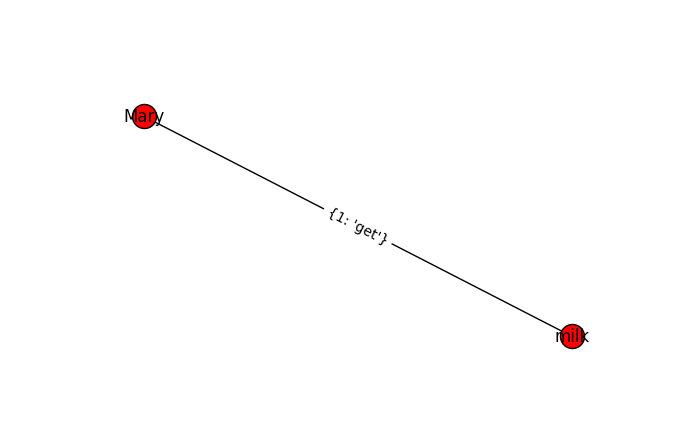

		2 John moved to the bedroom.


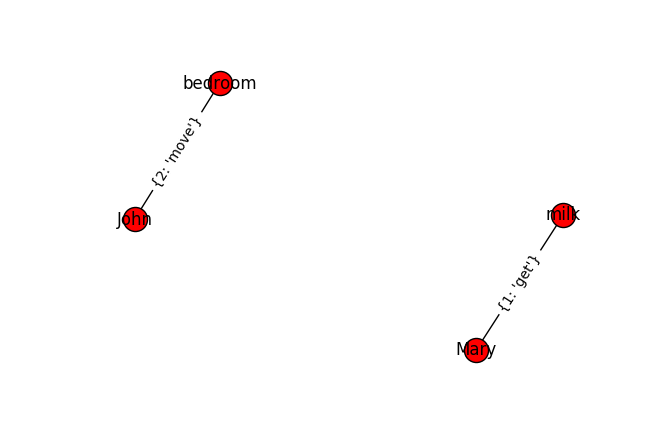

		3 Sandra went back to the kitchen.


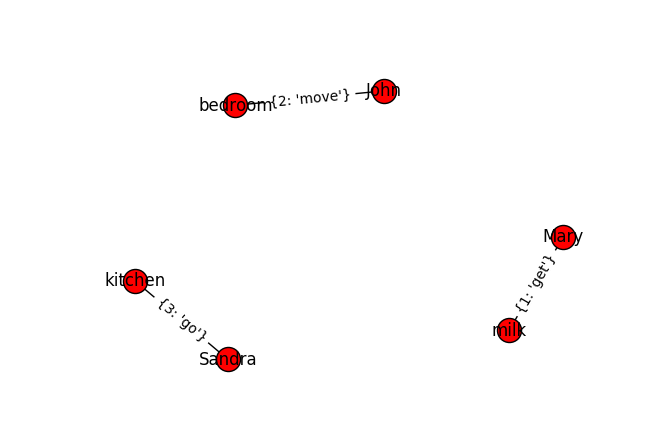

		4 Mary travelled to the hallway.


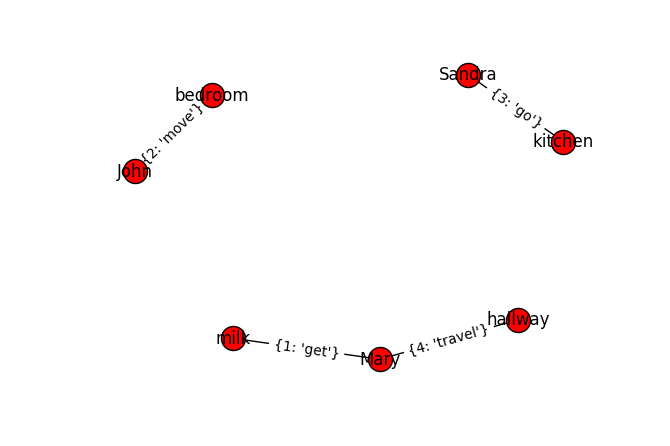

Where is the milk? 
Do you want me to answer the question (yes/no)

We know that
1 Mary got the milk there.
and then
4 Mary travelled to the hallway.
Hence, we can infer that
milk is present in hallway
Do you want me to continue with some more facts? (yes/no)
yes


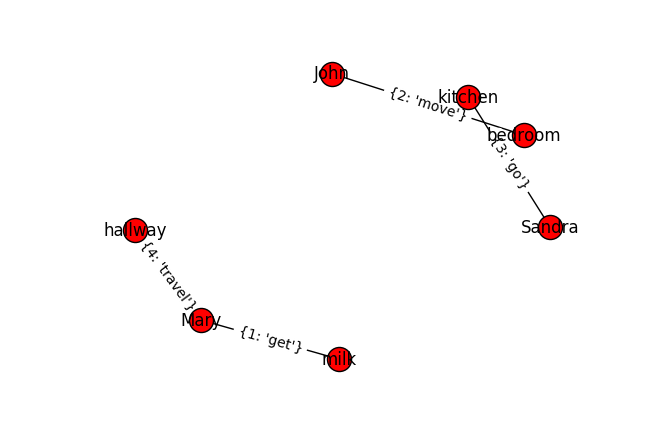

		6 John got the football there.


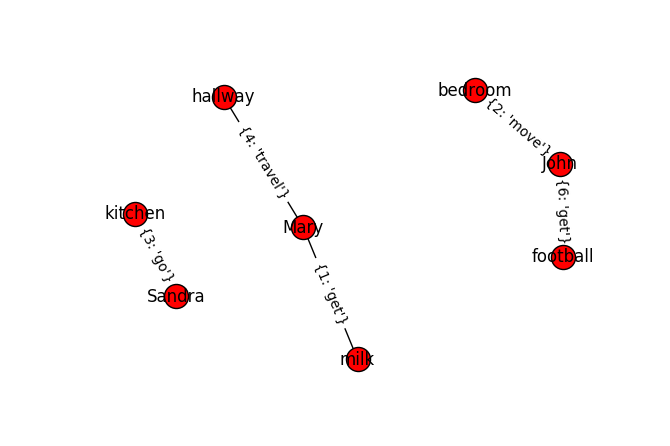

		7 John went to the hallway.


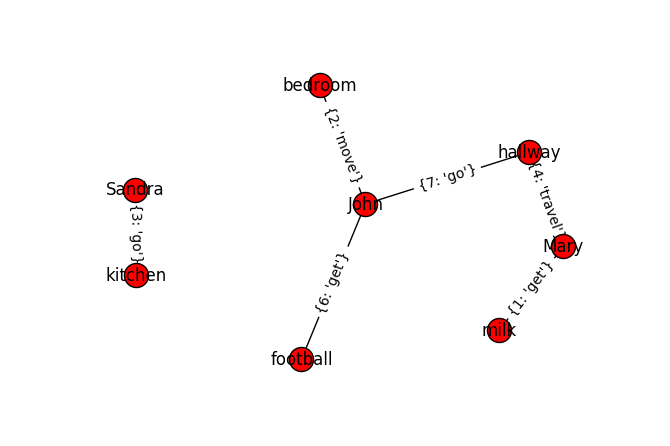

Where is the football? 
Do you want me to answer the question (yes/no)
yes
We know that
2 John moved to the bedroom.
and then
6 John got the football there.
and then
7 John went to the hallway.
Hence, we can infer that
football is at hallway
Do you want me to continue with some more facts? (yes/no)
no
Wrote 2 records to twofacts-output.tsv


In [9]:
# Answer the questions
bg = BabiGraph(int_graph=True, interactive=True, interactive_delay=2, corenlp=corenlp_url)
results = bg.play(parsed_file)
bg.write_results(results, output_file)